In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [4]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/train.csv")

In [5]:
df=df.iloc[:,[1,2,3,4,5]]
df.sample(4)

,date,country,store,product,num_sold
60875,2020-06-22,France,KaggleMart,Kaggle for Kids: One Smart Goose,361
43864,2019-07-03,Spain,KaggleMart,Kaggle Advanced Techniques,234
29251,2018-09-02,Germany,KaggleMart,Kaggle for Kids: One Smart Goose,501
55125,2020-02-23,Germany,KaggleRama,Kaggle Getting Started,107


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      70128 non-null  object
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [7]:
df.date= pd.DatetimeIndex(df.date)

In [8]:
df.head(2)

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615


In [9]:
df.country.value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [10]:
df.store.value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [11]:
df["product"].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

<AxesSubplot:>

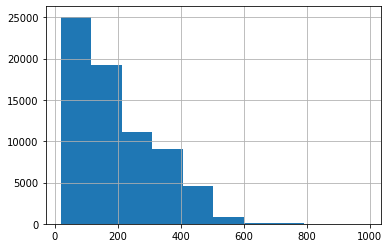

In [12]:
df.num_sold.hist()

In [13]:
#df=df.set_index("date")

<AxesSubplot:>

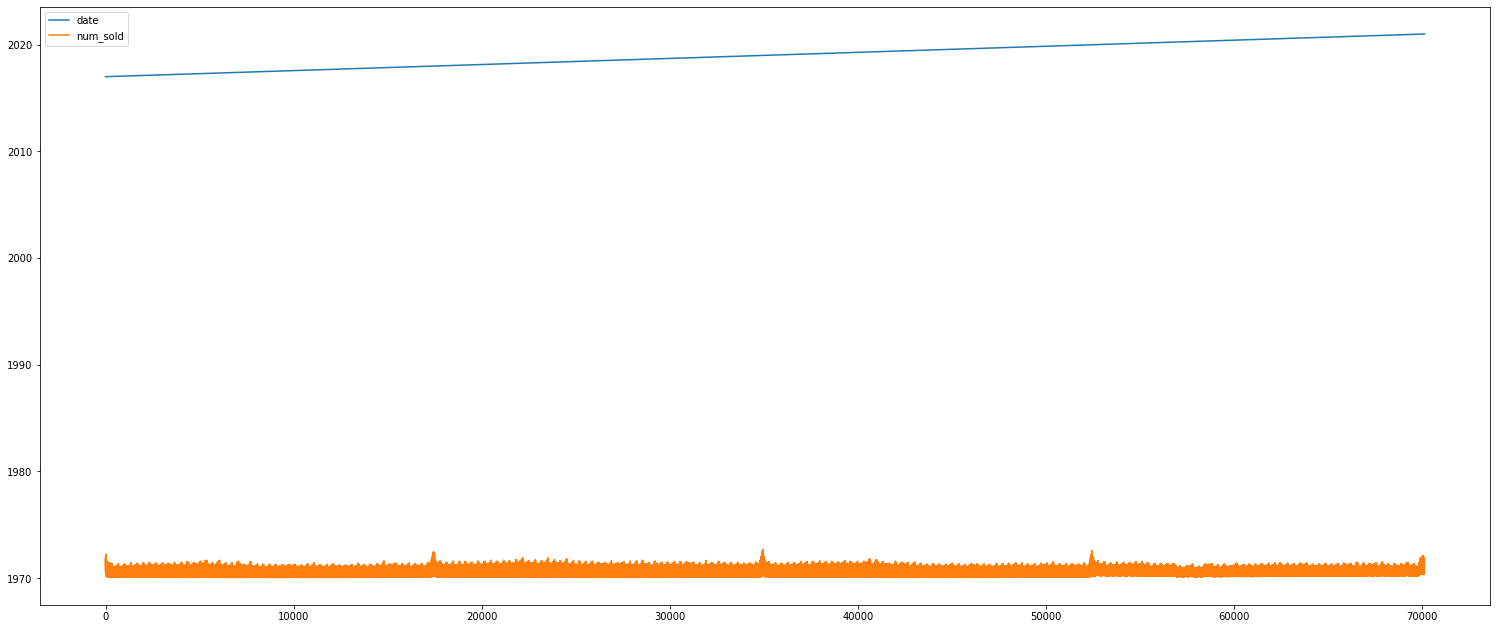

In [14]:
df.plot(kind="line",figsize=(26,11))

In [15]:
df.shape

(70128, 5)

In [16]:
x = df.iloc[:,[0,1,2,3]]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
final = ohe.fit_transform(x.iloc[:,[1,2,3]])
final = pd.DataFrame(final.toarray())
final

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
df

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [18]:
final['Day'] = pd.DatetimeIndex(df['date']).day
final['Month'] = pd.DatetimeIndex(df['date']).month
final['Year'] = pd.DatetimeIndex(df['date']).year
final['quarter'] = df['date'].dt.quarter
final['month'] = df['date'].dt.month
final['day'] = df['date'].dt.day
final['dayofweek'] = df['date'].dt.dayofweek
#fianl['dayofmonth'] = df['date'].dt.days_in_month
final['dayofyear'] = df['date'].dt.dayofyear
final['weekofyear'] = df['date'].dt.weekofyear
#final['is_weekend'] = np.where((df['dayofweek'] == 5) | (df['dayofweek'] == 6), 1, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [19]:
final

,0,1,2,3,4,5,6,7,8,9,...,11,Day,Month,Year,quarter,month,day,dayofweek,dayofyear,weekofyear
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1,1,2017,1,1,1,6,1,52
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1,1,2017,1,1,1,6,1,52
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,1,2017,1,1,1,6,1,52
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1,1,2017,1,1,1,6,1,52
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1,1,2017,1,1,1,6,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,31,12,2020,4,12,31,3,366,53
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,31,12,2020,4,12,31,3,366,53
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,31,12,2020,4,12,31,3,366,53
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,31,12,2020,4,12,31,3,366,53


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
y = df.iloc[:,4]

In [22]:
final

,0,1,2,3,4,5,6,7,8,9,...,11,Day,Month,Year,quarter,month,day,dayofweek,dayofyear,weekofyear
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1,1,2017,1,1,1,6,1,52
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1,1,2017,1,1,1,6,1,52
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,1,2017,1,1,1,6,1,52
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1,1,2017,1,1,1,6,1,52
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1,1,2017,1,1,1,6,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,31,12,2020,4,12,31,3,366,53
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,31,12,2020,4,12,31,3,366,53
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,31,12,2020,4,12,31,3,366,53
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,31,12,2020,4,12,31,3,366,53


In [23]:
model.fit(final,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [24]:
dd = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/test.csv")

In [25]:
final2 = pd.DataFrame(ohe.fit_transform(dd.iloc[:,[2,3,4]]).toarray())

In [26]:
final2['Day'] = pd.DatetimeIndex(dd['date']).day
final2['Month'] = pd.DatetimeIndex(dd['date']).month
final2['Year'] = pd.DatetimeIndex(dd['date']).year
final2['quarter'] = df['date'].dt.quarter
final2['month'] = df['date'].dt.month
final2['day'] = df['date'].dt.day
final2['dayofweek'] = df['date'].dt.dayofweek
#fianl2['dayofmonth'] = df['date'].dt.days_in_month
final2['dayofyear'] = df['date'].dt.dayofyear
final2['weekofyear'] = df['date'].dt.weekofyear
#final2['is_weekend'] = np.where((final2['dayofweek'] == 5) | (final2['dayofweek'] == 6), 1, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [27]:
final2

,0,1,2,3,4,5,6,7,8,9,...,11,Day,Month,Year,quarter,month,day,dayofweek,dayofyear,weekofyear
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1,1,2021,1,1,1,6,1,52
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1,1,2021,1,1,1,6,1,52
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,1,2021,1,1,1,6,1,52
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1,1,2021,1,1,1,6,1,52
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1,1,2021,1,1,1,6,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,31,12,2021,4,12,31,6,365,52
17516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,31,12,2021,4,12,31,6,365,52
17517,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,31,12,2021,4,12,31,6,365,52
17518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,31,12,2021,4,12,31,6,365,52


In [28]:
pred = model.predict(final2)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [29]:
ss = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv")
ss

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100
...,...,...
17515,87643,100
17516,87644,100
17517,87645,100
17518,87646,100


In [30]:
pred = [int(p) for p in pred]
submit = pd.DataFrame({"row_id":ss.row_id,"num_sold":pred})
submit.to_csv("Submission.csv",index=False)

In [31]:
pd.read_csv("Submission.csv")

,row_id,num_sold
0,70128,349
1,70129,305
2,70130,260
3,70131,367
4,70132,161
...,...,...
17515,87643,357
17516,87644,150
17517,87645,106
17518,87646,61


In [32]:
import xgboost

In [33]:
model = xgboost.XGBRegressor()

In [45]:
param_grid = {
    'n_estimators': [400, 700],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
rand_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs = 50,
    cv = 2,
    n_iter=5,
    verbose=420
)

In [52]:
rand_search.fit(final,y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


Exception ignored in: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/runpy.py", line 183, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/opt/conda/lib/python3.7/runpy.py", line 109, in _get_module_details
    __import__(pkg_name)
  File "/opt/conda/lib/python3.7/site-packages/joblib/__init__.py", line 113, in <module>
    from .memory import Memory, MemorizedResult, register_store_backend
  File "/opt/conda/lib/python3.7/site-packages/joblib/memory.py", line 33, in <module>
    from ._store_backends import StoreBackendBase, FileSystemStoreBackend
  File "/opt/conda/lib/python3.7/site-packages/joblib/_store_backends.py", line 15, in <module>
    from .backports import concurrency_safe_rename
  File "/opt/conda/lib/python3.7/site-packages/joblib/backports.py", line 13, in <module>
    import numpy as np
  File "/opt/conda/lib/python3.7/site-packages/numpy/__init__.py", line 150, in <module>
    from . import core


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [42]:
model = rand_search.best_estimator_

In [43]:
model.fit(final,y)

[CV 1/2; 10/10] START colsample_bytree=0.7, max_depth=20, n_estimators=700, subsample=0.7
[CV 1/2; 10/10] END colsample_bytree=0.7, max_depth=20, n_estimators=700, subsample=0.7;, score=0.969 total time= 9.7min
[CV 2/2; 10/10] START colsample_bytree=0.7, max_depth=20, n_estimators=700, subsample=0.7
[CV 2/2; 10/10] END colsample_bytree=0.7, max_depth=20, n_estimators=700, subsample=0.7;, score=0.776 total time= 9.8min


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [44]:
red = model.predict(final2)
red = [int(p) for p in red]
submit = pd.DataFrame({"row_id":ss.row_id,"num_sold":red})
submit.to_csv("Submission8.csv",index=False)